In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#trainデータの読み込み
train = pd.read_csv('train_new.csv')
#testデータの読み込み
test = pd.read_csv('test_new.csv')

In [3]:
print('trainデータの大きさ' + str(train.shape))
print(train.isnull().sum())
print('\n')
print('testデータの大きさ' + str(test.shape))
print(test.isnull().sum())

trainデータの大きさ(1953, 43)
id             0
y              0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
address        0
capa           0
dtype: int64


testデータの大きさ(313, 42)
id             0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
home_score     0
away_score     0
weathe

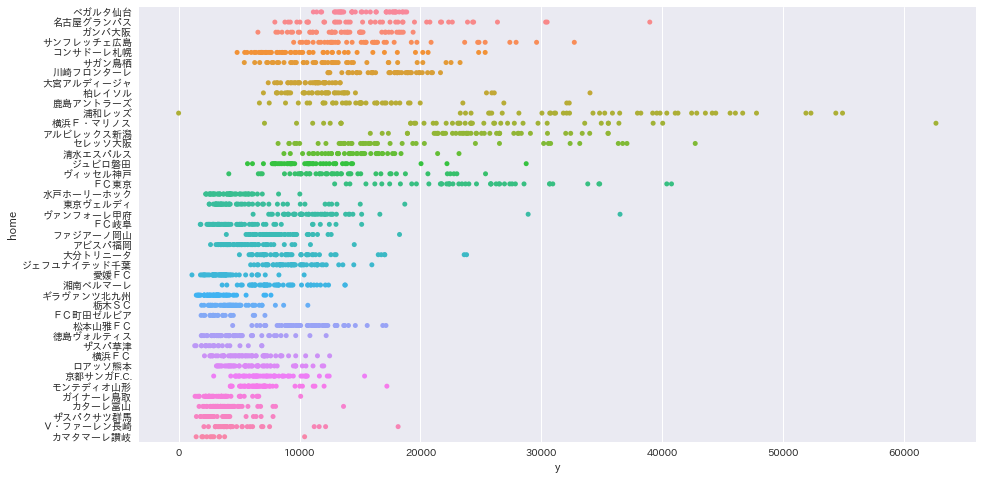

In [4]:
#チームごとの観客数の分布
sns.set_style("whitegrid")

sns.set_palette("husl")

sns.set_context("notebook")

plt.figure(figsize=(15, 8))

sns.set(font='IPAexGothic')


sns.stripplot(x=train["y"], y =train["home"])

In [5]:
#浦和の0付近を取り出す
train.query('home == "浦和レッズ" and y < 1000')

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
1567,15699,0,2014,Ｊ１,第４節第１日,03/23(日),15:04,浦和レッズ,清水エスパルス,埼玉スタジアム２００２,...,カルフィン ヨン ア ピン,吉田 豊,河井 陽介,六平 光成,竹内 涼,大前 元紀,ノヴァコヴィッチ,長沢 駿,埼玉県さいたま市緑区中野田500,63700


In [6]:
#無観客試合であったので取り除く
train = train.drop(1567)

<function matplotlib.pyplot.show(*args, **kw)>

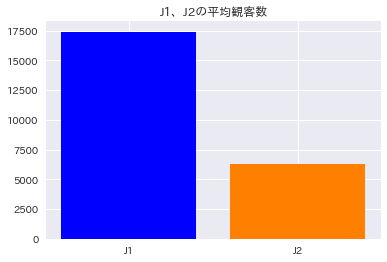

In [7]:
#J1とJ2の観客数の平均を比較
y_j1 = train.query('stage == "Ｊ１"').loc[:, 'y'].mean()
y_j2 = train.query('stage == "Ｊ２"').loc[:, 'y'].mean()

stage_1 = ['J1']
audi_1 = [y_j1]

stage_2 = ['J2']
audi_2 = [y_j2]

plt.title('J1、J2の平均観客数')

plt.bar(stage_1, audi_1, color = 'blue')
plt.bar(stage_2, audi_2, color = '#ff7f00')

plt.show

In [8]:
#stage…J１、J２には上下関係があるので順序尺度
#J1→1
#J2→２
stage_mapping = {'Ｊ１': 1, 'Ｊ２': 2}

train['stage'] = train['stage'].map(stage_mapping)

test['stage'] = test['stage'].map(stage_mapping)

In [9]:
#match…第１節を1、第２節を2というように書き換える
#全角を半角に直すためにmojimojiを用いる
import mojimoji

train['match'] = train['match'].str[1:-4].astype(str)
train['match'] = train['match'].map(mojimoji.zen_to_han).astype(int)

test['match'] = test['match'].str[1:-4].astype(str)
test['match'] = test['match'].map(mojimoji.zen_to_han).astype(int)

In [10]:
#gameday…土日と平日の差
df = train.loc[:, ['stage', 'gameday', 'year', 'y']]
df['gameday'] = df['gameday'].str[6:7]
df_1 = df.query('stage == "1"')
df_2 = df.query('stage == "2"')

#2012,2013,2014と分ける
#J1
df_1_12 = df_1.query('year == "2012"')
df_1_13 = df_1.query('year == "2013"')
df_1_14 = df_1.query('year == "2014"')
#J2
df_2_12 = df_2.query('year == "2012"')
df_2_13 = df_2.query('year == "2013"')
df_2_14 = df_2.query('year == "2014"')

#土日の平均
#J1
y_1_12 = df_1_12.query('gameday == "土" or gameday == "日"').loc[:, 'y'].mean()
y_1_13 = df_1_13.query('gameday == "土" or gameday == "日"').loc[:, 'y'].mean()
y_1_14 = df_1_14.query('gameday == "土" or gameday == "日"').loc[:, 'y'].mean()
#J2
y_2_12 = df_2_12.query('gameday == "土" or gameday == "日"').loc[:, 'y'].mean()
y_2_13 = df_2_13.query('gameday == "土" or gameday == "日"').loc[:, 'y'].mean()
y_2_14 = df_2_14.query('gameday == "土" or gameday == "日"').loc[:, 'y'].mean()

#平日の平均
#J1
y_1_22 = df_1_12.query('gameday != "土" and gameday != "日"').loc[:, 'y'].mean()
y_1_23 = df_1_13.query('gameday != "土" and gameday != "日"').loc[:, 'y'].mean()
y_1_24 = df_1_14.query('gameday != "土" and gameday != "日"').loc[:, 'y'].mean()


y_2_22 = df_2_12.query('gameday != "土" and gameday != "日"').loc[:, 'y'].mean()
y_2_23 = df_2_13.query('gameday != "土" and gameday != "日"').loc[:, 'y'].mean()
y_2_24 = df_2_14.query('gameday != "土" and gameday != "日"').loc[:, 'y'].mean()

y1_1 = np.array([y_1_12, y_1_13, y_1_14])
y1_2 = np.array([y_1_22, y_1_23, y_1_24])
y2_1 = np.array([y_2_12, y_2_13, y_2_14])
y2_2 = np.array([y_2_22, y_2_23, y_2_24])

<function matplotlib.pyplot.show(*args, **kw)>

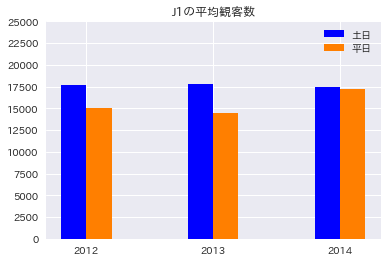

In [11]:
x1 = np.arange(len(y1_1))
w = 0.2

plt.title('J1の平均観客数')

plt.bar(x1, y1_1, width = w, label = '土日', align = 'center', color = 'blue')
plt.bar(x1 + w, y1_2, width = w, label = '平日', align = 'center', color = '#ff7f00')

plt.legend(loc="best")

plt.xticks(x1 +w/2, ['2012', '2013', '2014'])
plt.yticks(np.arange(0, 27500, 2500))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

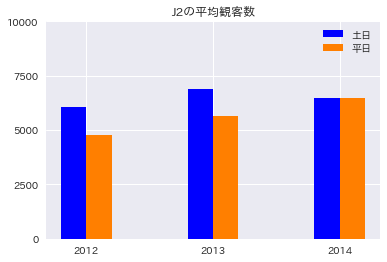

In [12]:
x2 = np.arange(len(y2_1))
w = 0.2

plt.title('J2の平均観客数')

plt.bar(x2, y2_1, width = w, label = '土日', align = 'center', color = 'blue')
plt.bar(x2 + w, y2_2, width = w, label = '平日', align = 'center', color = '#ff7f00')

plt.xticks(x2 +w/2, ['2012', '2013', '2014'])
plt.yticks(np.arange(0, 12500, 2500))

plt.legend(loc = 'upper right')

plt.show

In [13]:
#gamedayを土日か平日かでダミー変数化
train['gameday'] = train['gameday'].str[6:7]
test['gameday'] = test['gameday'].str[6:7]

def day(x):
    if x == '土':
        x = 1
    elif x == '日':
        x = 1
    else:
        x = 0
    return x

train['gameday'] = train['gameday'].apply(day)
test['gameday'] = test['gameday'].apply(day)

In [14]:
#time…何時という情報のみを取り出してエンコードする
train['time'] = train['time'].str[0:2]
test['time'] = test['time'].str[0:2]

In [15]:
#home,away…one-hotエンコードする
#あとで追加
home_train = pd.get_dummies(train['home'])
home_train_1 = home_train.rename(columns=lambda s: 'home-' + s)
away_train = pd.get_dummies(train['away'])
away_train_1 = away_train.rename(columns=lambda s: 'away-' + s)

home_test = pd.get_dummies(test['home'])
home_test_1 = home_test.rename(columns=lambda s: 'home-' + s)
away_test = pd.get_dummies(test['away'])
away_test_1 = away_test.rename(columns=lambda s: 'away-' + s)

In [16]:
#trainデータには存在していて、testデータには存在していないチームがあるのでそのチームのcolumnを追加する

In [17]:
#ザスパ草津(ザスパクサツ群馬に改名)、FC町田セルビア(降格)、ガイナーレ鳥取(降格)によりtestデータには存在していない

In [18]:
#testデータと同じ長さの配列を作成
add_0 = np.zeros(313 * 6).reshape((313, 6))

columns = ['home-ザスパ草津', 'home-ＦＣ町田ゼルビア', 'home-ガイナーレ鳥取', 'away-ザスパ草津', 'away-ＦＣ町田ゼルビア', 'away-ガイナーレ鳥取']
add_team = pd.DataFrame(data=add_0, columns=columns, dtype = 'int')

In [19]:
#stadium…屋内かどうかでダミー変数化
#あとで追加
def stad(x):
    if '屋内' in x:
        x = 1
    else:
        x = 0
    return x

stadium_train = train.loc[:,['weather']]
stadium_train['weather'] = stadium_train['weather'].apply(stad)
stadium_train.columns = ['stadium']

stadium_test = test.loc[:,['weather']]
stadium_test['weather'] = stadium_test['weather'].apply(stad)
stadium_test.columns = ['stadium']

In [20]:
#weather…天気が雨かどうかも客足に影響があるのではないかと考え、雨という予報のある日とそうでない日に分ける
#あとで追加
def rain(x):
    if '雨' in x:
        x = 1
    elif '雪' in x:
        x = 1
    else:
        x = 0
    return x


weather_train = train.loc[:,['weather']]
weather_train['weather'] = weather_train['weather'].apply(rain)

weather_test = test.loc[:,['weather']]
weather_test['weather'] = weather_test['weather'].apply(rain)

In [21]:
#tv…地上波で放送される試合は注目度が高く観客数にも影響があるのではないかと考え、NHK総合、NHK BS1、それ以外で分けてみる
def televi(x):
    if 'ＮＨＫ総合' in x:
        x = 0
    elif 'ＮＨＫ　ＢＳ１' in x:
        x = 1
    else:
        x = 2
    return x
tv = train.loc[:, ['stage', 'tv', 'y']]
tv['tv'] = tv['tv'].apply(televi)

#J1の試合は放送されている印象があったのでまずはJ1について調べてみる
y_j1_0 = tv.query('stage == "1" and tv == "0"').loc[:, 'y'].mean()
y_j1_1 = tv.query('stage == "1" and tv == "1"').loc[:, 'y'].mean()
y_j1_2 = tv.query('stage == "1" and tv == "2"').loc[:, 'y'].mean()

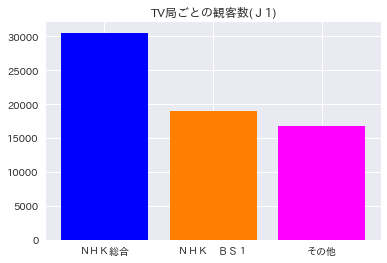

In [22]:
x0 = ['ＮＨＫ総合']
x1 = ['ＮＨＫ　ＢＳ１']
x2 = ['その他']

y0 =[y_j1_0]
y1 =[y_j1_1]
y2 =[y_j1_2]

plt.title('TV局ごとの観客数(Ｊ1)')

plt.bar(x0, y0, color = 'blue')
plt.bar(x1, y1, color = '#ff7f00')
plt.bar(x2, y2, color = 'magenta')

plt.show()

In [23]:
#NHK総合とそれ以外でマッピングするのが良さそう

In [24]:
#J2でNHK総合で放送された試合はあったのか
tv.query('stage == "2" and tv == "0"')

,stage,tv,y


In [25]:
#なかった

In [26]:
def television(x):
    if 'ＮＨＫ総合' in x:
        x = 1
    else:
        x = 0
    return x
    
train['tv'] = train['tv'].apply(television)
test['tv'] = test['tv'].apply(television)

In [27]:
#homeチームの前年度の観客数平均は今年度の観客数を予測するためのある程度になる？

In [28]:
tr_home_audi = train.loc[:,['home']]
tr_home_audi['home'] = tr_home_audi['home'].map({'湘南ベルマーレ':'1', '京都サンガF.C.':'1', '徳島ヴォルティス':'1', 'ジェフユナイテッド千葉':'1', 'Ｖ・ファーレン長崎':'1',
      '栃木ＳＣ':'1', 'モンテディオ山形':'1', '横浜ＦＣ':'1', 'ファジアーノ岡山':'1', '東京ヴェルディ':'1', 'アビスパ福岡':'1',
      '水戸ホーリーホック':'1', 'ギラヴァンツ北九州':'1', '愛媛ＦＣ':'1', 'カターレ富山':'1', 'ロアッソ熊本':'1', 'ザスパクサツ群馬':'1', 'ザスパ草津':'1', 'ガイナーレ鳥取':'1',
      'ＦＣ岐阜':'1', 'カマタマーレ讃岐':'1', 'ＦＣ町田ゼルビア':'1', 'サンフレッチェ広島':'2', '川崎フロンターレ':'2', 'セレッソ大阪':'2', '鹿島アントラーズ':'2', '清水エスパルス':'2', '柏レイソル':'2',
      '名古屋グランパス':'2', 'サガン鳥栖':'2', 'ベガルタ仙台':'2', '大宮アルディージャ':'2', 'ヴァンフォーレ甲府':'2', 'ジュビロ磐田':'2',
      '大分トリニータ':'2', 'ガンバ大阪':'2', 'ヴィッセル神戸':'2', '松本山雅ＦＣ':'2', 'コンサドーレ札幌':'2', '横浜Ｆ・マリノス':'3', 'アルビレックス新潟':'3', 'ＦＣ東京':'3', '浦和レッズ':'4'})
tr_home_audi.columns = ['home-audi']

In [29]:
te_home_audi = test.loc[:,['home']]
te_home_audi['home'] = te_home_audi['home'].map({'湘南ベルマーレ':'1', '京都サンガF.C.':'1', '徳島ヴォルティス':'1', 'ジェフユナイテッド千葉':'1', 'Ｖ・ファーレン長崎':'1',
      '栃木ＳＣ':'1', 'モンテディオ山形':'1', '横浜ＦＣ':'1', 'ファジアーノ岡山':'1', '東京ヴェルディ':'1', 'アビスパ福岡':'1',
      '水戸ホーリーホック':'1', 'ギラヴァンツ北九州':'1', '愛媛ＦＣ':'1', 'カターレ富山':'1', 'ロアッソ熊本':'1', 'ザスパクサツ群馬':'1', 'ザスパ草津':'1', 'ガイナーレ鳥取':'1',
      'ＦＣ岐阜':'1', 'カマタマーレ讃岐':'1', 'ＦＣ町田ゼルビア':'1', 'サンフレッチェ広島':'2', '川崎フロンターレ':'2', 'セレッソ大阪':'2', '鹿島アントラーズ':'2', '清水エスパルス':'2', '柏レイソル':'2',
      '名古屋グランパス':'2', 'サガン鳥栖':'2', 'ベガルタ仙台':'2', '大宮アルディージャ':'2', 'ヴァンフォーレ甲府':'2', 'ジュビロ磐田':'2',
      '大分トリニータ':'2', 'ガンバ大阪':'2', 'ヴィッセル神戸':'2', '松本山雅ＦＣ':'2', 'コンサドーレ札幌':'2', '横浜Ｆ・マリノス':'3', 'アルビレックス新潟':'3', 'ＦＣ東京':'3', '浦和レッズ':'4'})
te_home_audi.columns = ['home-audi']

In [30]:
#説明変数
train_x = train.loc[:, ['year', 'stage', 'match', 'gameday', 'time', 'tv', 'capa']]
X_Train = pd.concat([train_x, stadium_train, weather_train, home_train_1, away_train_1], axis = 1)
X_train = X_Train.values

test_x = test.loc[:, ['year', 'stage', 'match', 'gameday', 'time', 'tv', 'capa']]
X_test = pd.concat([test_x, stadium_test, weather_test, home_test_1, away_test_1, add_team], axis = 1)
X_test = X_test.values

#説明変数1
X_Train_1 = pd.concat([train_x, stadium_train, weather_train, home_train_1, away_train_1, tr_home_audi], axis = 1)
X_train_1 = X_Train_1.values

X_test_1 = pd.concat([test_x, stadium_test, weather_test, home_test_1, away_test_1, add_team, te_home_audi], axis = 1)
X_test_1 = X_test_1.values

#目的変数
y_train = train.loc[:,['y']]
y_train = y_train.values.reshape(-1)

In [31]:
#勾配ブースティングの回帰をインポート
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_train_1, y_train, test_size=0.3, random_state=1)


In [33]:
## データの分割方法を指定
from sklearn.model_selection import KFold
kf_7 = KFold(n_splits=7, shuffle=True, random_state=0)

In [34]:
#グリッドサーチをインポート
from sklearn.model_selection import GridSearchCV

In [35]:
#パラメータの調整
#max_depth…木の深さ、正則化のようにバリアンスを抑えることができる
#min_samples_split…ノードとして必要な最小サンプル数
#min_samples_leaf…リーフとして必要な最小サンプル数、木の深さと関係ありそう、小さくすると過学習をする
#n_estimators
#の４つを調整する

In [36]:
#n_estimators…作成するツリーの数、learning_rateと反比例の関係にある
#learning_rateを0.1に固定し、n_estimatorsを検証する

gbr_1 =GradientBoostingRegressor()

param_gbr_1 = {'n_estimators': list(range(20, 101, 10))}

gs_gbr_1 = GridSearchCV(gbr_1, param_grid = param_gbr_1, cv = kf_7)

gs_gbr_1.fit(X_1_train, y_1_train)

GridSearchCV(cv=KFold(n_splits=7, random_state=0, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/joshimo11/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


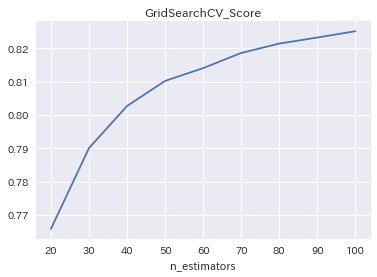

In [37]:
#可視化
mean_list_1 = []
for s in gs_gbr_1.grid_scores_:
    mean_list_1.append(s[1])

plt.plot(list(range(20, 101, 10)), mean_list_1)
plt.title('GridSearchCV_Score')
plt.xlabel('n_estimators')
plt.xticks(np.arange(20, 101, 10))
plt.show()

In [38]:
#n_estimatorsの値が大きくなると計算量が多くなるため、n_estimators = 70と設定する

In [39]:
#min_samples_split…ノードとして必要な最小サンプル数、小さすぎると過学習、大きすぎると未学習。データの0.5%〜2%程度

In [40]:
#min_samples_split, max_depthを検証する
#min_samples_split
#trainデータ(2000個)の7割のデータをグリッドサーチのtrainデータとして用いるので1400の7〜28くらいを検証
#max_depth
#木の深さ、多いと過学習になる


gbr_2 =GradientBoostingRegressor(n_estimators = 70)

param_gbr_2 = {'min_samples_split': list(range(10, 31, 2)), 'max_depth': list(range(3, 8, 1))}

gs_gbr_2 = GridSearchCV(gbr_2, param_grid = param_gbr_2, cv = kf_7)

gs_gbr_2.fit(X_1_train, y_1_train)

GridSearchCV(cv=KFold(n_splits=7, random_state=0, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=70, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'max_depth': [3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
gs_gbr_2.best_params_

{'max_depth': 6, 'min_samples_split': 28}

In [42]:
#max_depthは6,min_samples_splitは28と設定する

In [43]:
#min_samples_leafを検証
#min_samples_leaf
#リーフとして必要な最小データ数、少ないと過学習

gbr_3 =GradientBoostingRegressor(n_estimators = 70, max_depth = 6, min_samples_split = 28)

param_gbr_3 = {'min_samples_leaf': list(range(4, 17, 2))}

gs_gbr_3 = GridSearchCV(gbr_3, param_grid = param_gbr_3, cv = 7)

gs_gbr_3.fit(X_1_train, y_1_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=70, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [4, 6, 8, 10, 12, 14, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
gs_gbr_3.best_params_

{'min_samples_leaf': 4}

/Users/joshimo11/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


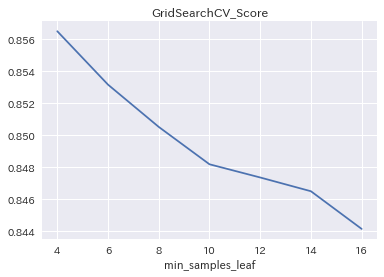

In [45]:
#可視化
mean_list_3 = []
for s in gs_gbr_3.grid_scores_:
    mean_list_3.append(s[1])

plt.plot(list(range(4, 17, 2)), mean_list_3)
plt.title('GridSearchCV_Score')
plt.xlabel('min_samples_leaf')
plt.xticks(np.arange(4, 17, 2))
plt.show()

In [46]:
#min_samples_leafは4と設定する

In [47]:
#learning_rateとn_estimatorsもグリッドサーチしてみる。

In [50]:
gbr_4 =GradientBoostingRegressor(max_depth = 6, min_samples_split = 28, min_samples_leaf = 4)

param_gbr_4 = {'learning_rate': list(np.arange(0.01, 0.11, 0.01)), 'n_estimators': list(range(100, 501, 50))}

gs_gbr_4 = GridSearchCV(gbr_4, param_grid = param_gbr_4, cv = 7)

gs_gbr_4.fit(X_1_train, y_1_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999], 'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
gs_gbr_4.best_params_

{'learning_rate': 0.09, 'n_estimators': 300}

/Users/joshimo11/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


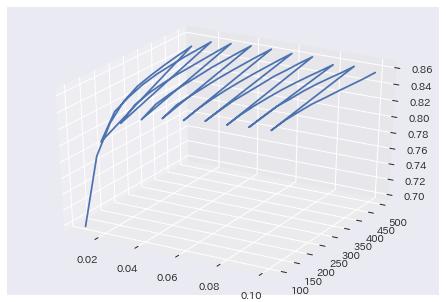

In [53]:
#from mpl_toolkits.mplot3d import Axes3D

x=[]
y=[]
z=[]
for s in gs_gbr_4.grid_scores_:
    x.append(s[0]["learning_rate"])
    y.append(s[0]["n_estimators"])
    z.append(s[1])
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z)
plt.show()

In [36]:
#グリッドサーチにより決定したパラメータを持つ勾配ブースティングのインスタンスを作成
gbr = GradientBoostingRegressor(learning_rate = 0.09, n_estimators = 300, max_depth = 6, min_samples_split = 28, min_samples_leaf = 4)

In [37]:
#学習1
gbr1 = gbr
gbr1.fit(X_1_train, y_1_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.09, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
#精度の確認
#RMSE
from sklearn.metrics import mean_squared_error as mse

print('capaなし')
print('train: %.5f' % (mse(y_1_train, gbr1.predict(X_1_train))**(1/2)))
print('test: %.5f' % (mse(y_1_test, gbr1.predict(X_1_test))**(1/2)))

capaなし
train: 1539.56888
test: 3165.46340


In [39]:
#学習2
gbr2 = gbr
gbr2.fit(X_2_train, y_2_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.09, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [40]:
#精度の確認
#RMSE
from sklearn.metrics import mean_squared_error as mse

print('train: %.5f' % (mse(y_2_train, gbr2.predict(X_2_train))**(1/2)))
print('test: %.5f' % (mse(y_2_test, gbr2.predict(X_2_test))**(1/2)))

train: 1523.43374
test: 3142.28856


In [41]:
#パラメータ調整なし
gbr_normal = GradientBoostingRegressor()

In [42]:
gbr_normal.fit(X_2_train, y_2_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [43]:
#精度の確認
#RMSE
from sklearn.metrics import mean_squared_error as mse

print('train: %.5f' % (mse(y_2_train, gbr_normal.predict(X_2_train))**(1/2)))
print('test: %.5f' % (mse(y_2_test, gbr_normal.predict(X_2_test))**(1/2)))

train: 2460.67921
test: 3106.03928


In [44]:
importances2 = gbr2.feature_importances_

In [45]:
importances2

array([5.13581623e-02, 4.45559215e-02, 1.86721000e-01, 2.65190897e-02,
       6.86116717e-02, 7.96424236e-03, 1.44692990e-01, 4.77686202e-03,
       1.55713007e-02, 1.27261653e-03, 6.04790539e-04, 3.21480244e-03,
       4.23957926e-03, 1.66531279e-03, 2.61769227e-03, 4.25570214e-06,
       6.38521407e-03, 1.41590980e-02, 8.56892076e-03, 3.64955752e-03,
       9.41718318e-04, 4.53974102e-03, 2.18174263e-03, 7.19392332e-03,
       3.27100587e-03, 4.56357781e-03, 2.34464656e-03, 2.13996460e-03,
       5.07030720e-03, 6.73911625e-03, 3.95389243e-03, 1.81684132e-02,
       6.89453188e-03, 1.05864926e-03, 3.28775572e-03, 2.37905349e-03,
       3.10290501e-03, 1.50548466e-03, 6.80701066e-03, 5.50088568e-04,
       3.68211792e-04, 7.03692127e-03, 3.14745771e-03, 2.23636932e-04,
       2.58455837e-03, 3.84479167e-03, 2.72640934e-03, 5.83878067e-03,
       6.63929060e-03, 5.57192632e-03, 0.00000000e+00, 3.60756746e-03,
       8.91104631e-04, 5.02265878e-03, 3.82353457e-03, 3.00316524e-03,
      

In [46]:
df = pd.DataFrame( importances2, X_Train_1.columns.values)
df.columns = ['importance']
df

,importance
year,0.051358
stage,0.044556
match,0.186721
gameday,0.026519
time,0.068612
tv,0.007964
capa,0.144693
stadium,0.004777
weather,0.015571
home-アビスパ福岡,0.001273


In [47]:
df_1_0 = df.sort_values('importance', ascending=False)
df_1 = df_1_0.iloc[:10, :]
df_1

,importance
match,0.186721
capa,0.144693
time,0.068612
year,0.051358
stage,0.044556
away-セレッソ大阪,0.036238
home-audi,0.030398
gameday,0.026519
away-浦和レッズ,0.018691
home-名古屋グランパス,0.018168


In [48]:
#予測
y_pred = gbr2.predict(X_test_1)

In [49]:
#書き出し
submit_file = pd.DataFrame({'id' : test['id'], 'y' : y_pred})
submit_file.to_csv('submit.csv', index = False)

In [50]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

In [74]:
#n_estimators…作成するツリーの数、learning_rateと反比例の関係にある
#learning_rateを0.1に固定し、n_estimatorsを検証する

rfr_1 =RandomForestRegressor()

param_rfr_1 = {'n_estimators': list(range(20, 201, 20))}

gs_rfr_1 = GridSearchCV(rfr_1, param_grid = param_rfr_1, cv = kf_7)

gs_rfr_1.fit(X_1_train, y_1_train)

GridSearchCV(cv=KFold(n_splits=7, random_state=0, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/joshimo11/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


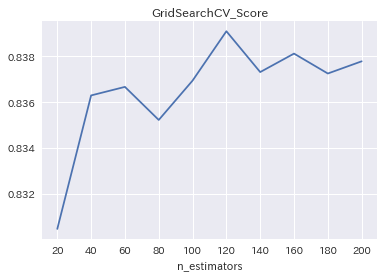

In [75]:
#可視化
mean_list_1 = []
for s in gs_rfr_1.grid_scores_:
    mean_list_1.append(s[1])

plt.plot(list(range(20, 201, 20)), mean_list_1)
plt.title('GridSearchCV_Score')
plt.xlabel('n_estimators')
plt.xticks(np.arange(20, 201, 20))
plt.show()

In [ ]:
#n_estimatorsは80とする

In [ ]:
#min_samples_split, max_depthを検証する
#min_samples_split
#trainデータ(2000個)の7割のデータをグリッドサーチのtrainデータとして用いるので1400の7〜28くらいを検証
#max_depth
#木の深さ、多いと過学習になる


rfr_2 =RandomForestRegressor(n_estimators = 80)

param_rfr_2 = {'min_samples_split': list(range(10, 31, 2)), 'max_depth': list(range(3, 8, 1))}

gs_rfr_2 = GridSearchCV(rfr_2, param_grid = param_rfr_2, cv = kf_7)

gs_rfr_2.fit(X_1_train, y_1_train)

In [ ]:
gs_rfr_2.best_params_

In [ ]:
#min_samples_leafを検証
#min_samples_leaf
#リーフとして必要な最小データ数、少ないと過学習

rfr_3 =GradientBoostingRegressor(n_estimators = 70, max_depth = 7, min_samples_split = 10)

param_rfr_3 = {'min_samples_leaf': list(range(4, 17, 2))}

gs_rfr_3 = GridSearchCV(rfr_3, param_grid = param_rfr_3, cv = 7)

gs_rfr_3.fit(X_1_train, y_1_train)

In [ ]:
gs_rfr_3.best_params_

In [ ]:
#可視化
mean_list_3 = []
for s in gs_rfr_3.grid_scores_:
    mean_list_3.append(s[1])

plt.plot(list(range(4, 17, 2)), mean_list_3)
plt.title('GridSearchCV_Score')
plt.xlabel('min_samples_leaf')
plt.xticks(np.arange(4, 17, 2))
plt.show()

In [51]:
#グリッドサーチにより決定したパラメータを持つランダムフォレストのインスタンスを作成
rfr = RandomForestRegressor(n_estimators = 80, max_depth = 7, min_samples_split = 10, min_samples_leaf = 12)

In [52]:
#学習
rfr.fit(X_2_train, y_2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
#精度の確認
#RMSE
from sklearn.metrics import mean_squared_error as mse

print('train: %.5f' % (mse(y_2_train, rfr.predict(X_2_train))**(1/2)))
print('test: %.5f' % (mse(y_2_test, rfr.predict(X_2_test))**(1/2)))

train: 3319.44788
test: 3850.32776


In [55]:
#パラメータ調整なしの場合
rfr_normal = RandomForestRegressor()

In [58]:
#学習
rfr_normal.fit(X_2_train, y_2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
#精度の確認
#RMSE
from sklearn.metrics import mean_squared_error as mse

print('train: %.5f' % (mse(y_2_train, rfr_normal.predict(X_2_train))**(1/2)))
print('test: %.5f' % (mse(y_2_test, rfr_normal.predict(X_2_test))**(1/2)))

train: 1463.73910
test: 3646.34703


In [60]:
importances_rfr = rfr.feature_importances_

In [61]:
importances_rfr = pd.DataFrame( importances_rfr, X_Train_1.columns.values)
importances_rfr.columns = ['importance']
importances_rfr

,importance
year,0.002159
stage,0.384689
match,0.014433
gameday,0.000604
time,0.004439
tv,0.000000
capa,0.228026
stadium,0.000210
weather,0.001377
home-アビスパ福岡,0.000008


In [62]:
importances_rfr.query('importance > 0.001')

,importance
year,0.002159
stage,0.384689
match,0.014433
time,0.004439
capa,0.228026
weather,0.001377
home-カターレ富山,0.001164
home-サンフレッチェ広島,0.017492
home-ジェフユナイテッド千葉,0.007347
home-ファジアーノ岡山,0.004919
